In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

In [9]:
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.MatrixToPauliString import *
from src.qiskit_utilities import *

from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.eigensolvers import VQD
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Estimator, Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute

from ipywidgets import IntProgress
from IPython.display import display, clear_output 

import scipy.sparse.linalg

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import os
import json
import math

In [4]:
h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

cutoff=16

ham=Hamiltonian(h_b_AHO,h_f_AHO,{m:1, g:1}, cutoff, standard_encode)


In [5]:
hamOP = pauli_string_to_op(ham.pauliStrings)
nq=math.floor(math.log2(ham.hamMatrix.shape[0]))
if not math.log2(ham.hamMatrix.shape[0]).is_integer():
    nq+=1

In [6]:
estimator = Estimator()
sampler=Sampler()
fidelity=ComputeUncompute(sampler)

ansatz = RealAmplitudes(nq, entanglement='linear', reps=1)

In [7]:
k=3
betas=[1,1,1]

counts=[]
values=[]
steps=[]

def callback(eval_count, params, value, meta, step):
    counts.append(eval_count)
    values.append(value)
    steps.append(step)

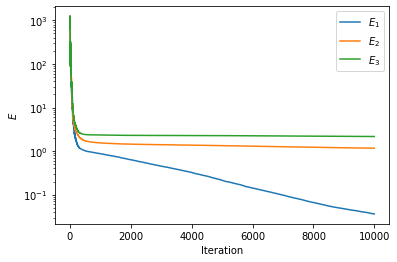

In [11]:
counts=[]
values=[]
steps=[]

vqd=VQD(estimator, fidelity, ansatz, optimizer=COBYLA(maxiter=10000, tol=1e-4), k=k, betas=betas, callback=callback)
result=vqd.compute_eigenvalues(operator=hamOP)

counts=np.asarray(counts)
steps=np.asarray(steps)
values=np.asarray(values)
for i in range(1,k+1):
    _counts=counts[np.where(steps==i)]
    _values=values[np.where(steps==i)]
    plt.plot(_counts,_values,label=r'$E_{{{}}}$'.format(i))
plt.xlabel(r'Iteration')
plt.ylabel(r'$E$')
plt.yscale('log')
plt.legend(loc='upper right')

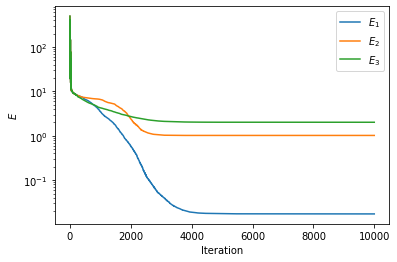

In [12]:
counts=[]
values=[]
steps=[]

vqd=VQD(estimator, fidelity, ansatz, optimizer=COBYLA(maxiter=10000, tol=1e-8), k=k, betas=betas, callback=callback)
result=vqd.compute_eigenvalues(operator=hamOP)

counts=np.asarray(counts)
steps=np.asarray(steps)
values=np.asarray(values)
for i in range(1,k+1):
    _counts=counts[np.where(steps==i)]
    _values=values[np.where(steps==i)]
    plt.plot(_counts,_values,label=r'$E_{{{}}}$'.format(i))
plt.xlabel(r'Iteration')
plt.ylabel(r'$E$')
plt.yscale('log')
plt.legend(loc='upper right')

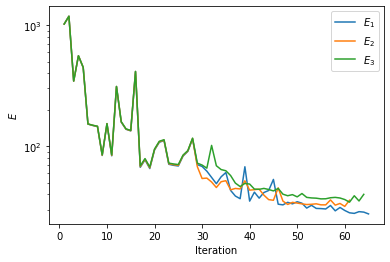

In [13]:
counts=[]
values=[]
steps=[]

vqd=VQD(estimator, fidelity, ansatz, optimizer=COBYLA(maxiter=10000, tol=1e-1), k=k, betas=betas, callback=callback)
result=vqd.compute_eigenvalues(operator=hamOP)

counts=np.asarray(counts)
steps=np.asarray(steps)
values=np.asarray(values)
for i in range(1,k+1):
    _counts=counts[np.where(steps==i)]
    _values=values[np.where(steps==i)]
    plt.plot(_counts,_values,label=r'$E_{{{}}}$'.format(i))
plt.xlabel(r'Iteration')
plt.ylabel(r'$E$')
plt.yscale('log')
plt.legend(loc='upper right')